<center><h1><strong>PROYECTO FINAL</strong></h1></center>


* __author__ = "@g30v4
* __date__ = "18/05/2021"
* __version__ = "1.0.0"
* __license__ = "GPL"
* __title__ = "Tratameinto de Datos" 

---
## Objetivo :
* Procesar los datos de la red social Twitter, con el fin de realizar un modelo de análisis de sentimiento


## **Ejercicio #1**

Calcular para cada tweet un valor denominado “sentimiento del tweet”, que se obtiene como la suma de los “sentimientos” de los términos que aparecen en el tweet.

### Pasos a Realizar
* 1) Carga de Datos (Tweets - Palabras)
* 2) Depuracion de Tweets
* 3) Limpieza del Texto
* 4) Determinar Sentimiento del Tweet
* 5) Consideraciones Extras
* 6) Observaciones

In [ ]:
# Instalación de las librerias o dependencias necesarias
!pip install pandas

In [ ]:
# Importar librerias
import pandas as pd # Libreria para analitica de datos
import unicodedata # Libraria util para la limpieza de texto
import re # Libreria para la manipulación y tratado de texto con expresiones regulares

### 1) Carga de Datos (Tweets)

In [ ]:
# Setear las fuentes de datos [Tweets y Sentimientos]
data = 'https://raw.githubusercontent.com/patofw/imf_master/master/proyecto_final_datos/Tweets.txt'
sentimientos = 'https://raw.githubusercontent.com/patofw/imf_master/master/proyecto_final_datos/Sentimientos.txt'

In [ ]:
# Carga de datos de Tweets
tweets = pd.read_json(data, lines=True) # Recupera los datos en formato json a tipo dataframe (Estructura de datos bidimensional) 
tweets.head()

,delete,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweet_count,favorite_count,entities,favorited,retweeted,possibly_sensitive,filter_level,lang,timestamp_ms,retweeted_status,extended_entities
0,"{'status': {'id': 294512601600258048, 'id_str'...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,NaN,2014-09-10 17:01:33+00:00,5.097485e+17,5.097485e+17,@Brenamae_ I WHALE SLAP YOUR FIN AND TELL YOU ...,"<a href=""http://twitter.com/download/android"" ...",0.0,5.097481e+17,5.097481e+17,242563886.0,242563886.0,Brenamae_,"{'id': 175160659, 'id_str': '175160659', 'name...",None,None,None,NaN,0.0,0.0,"{'hashtags': [], 'trends': [], 'urls': [], 'us...",0.0,0.0,0.0,medium,en,2014-09-10 17:01:33.668,NaN,NaN
2,"{'status': {'id': 204951917716189185, 'id_str'...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,"{'status': {'id': 509733211497193473, 'id_str'...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,"{'status': {'id': 509745353999278080, 'id_str'...",NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [ ]:
# Verificamos la dimension del dataframe
print(f"Rows: {len(tweets.axes[0])} , Cols : {len(tweets.axes[1])}")

Rows: 501 , Cols : 28


In [ ]:
# Determinar los registros que son tweets, a partir de sus columnas
'''
Todas aquellas columnas que su campo [text] sea nulo, no seran de utilidad para su procesamiento
de gual forma aquellos registros que tengan contenido en la columna [delete] seran considerados
para su eliminación.
Se puede observar que existen 79 registros que su campo [text] tiene nulos que de igual forma 
dichos registros tienen contenido en la columna [delete], estos seran considerados para la depuración
'''
print(f"Total [delete] : {tweets['delete'].count()} , \t\t | Total [text] : {tweets['text'].count()}")
print(f"Total [delete] NaN : {tweets['delete'].isna().sum()} , \t | Total [text] NaN : {tweets['text'].isna().sum()}")

Total [delete] : 79 , 		 | Total [text] : 422
Total [delete] NaN : 422 , 	 | Total [text] NaN : 79


### 2) Depuracion de Tweets

In [ ]:
# Depuración de los Datos
'''
En este paso removeremos aquellos registros cuyo valor en la columna [text] sea NaN o nulo
'''
tweetsCls = tweets[tweets['text'].notna()]
# Verificamos que no existan registros con la columna [delete]
print(f"Total [delete] : {tweetsCls['delete'].count()} , \t| Total [text] : {tweetsCls['text'].count()}")

Total [delete] : 0 , 	| Total [text] : 422


In [ ]:
# Mostramos algunos registros del dataframe depurado
tweetsCls.head()

,delete,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweet_count,favorite_count,entities,favorited,retweeted,possibly_sensitive,filter_level,lang,timestamp_ms,retweeted_status,extended_entities
1,NaN,2014-09-10 17:01:33+00:00,5.097485e+17,5.097485e+17,@Brenamae_ I WHALE SLAP YOUR FIN AND TELL YOU ...,"<a href=""http://twitter.com/download/android"" ...",0.0,5.097481e+17,5.097481e+17,242563886.0,242563886.0,Brenamae_,"{'id': 175160659, 'id_str': '175160659', 'name...",None,None,None,NaN,0.0,0.0,"{'hashtags': [], 'trends': [], 'urls': [], 'us...",0.0,0.0,0.0,medium,en,2014-09-10 17:01:33.668,NaN,NaN
14,NaN,2014-09-10 17:01:34+00:00,5.097485e+17,5.097485e+17,Metin Şentürk Twitterda @metinsenturk MUHTEŞEM...,"<a href=""http://www.twitter.com"" rel=""nofollow...",0.0,NaN,NaN,NaN,NaN,None,"{'id': 2748960160, 'id_str': '2748960160', 'na...",None,None,None,NaN,0.0,0.0,"{'hashtags': [], 'trends': [], 'urls': [], 'us...",0.0,0.0,0.0,medium,tr,2014-09-10 17:01:34.662,NaN,NaN
15,NaN,2014-09-10 17:01:34+00:00,5.097485e+17,5.097485e+17,RT @byunghns: 😭 I LOVE #틴탑 SO MUCH #쉽지않아 IS GO...,"<a href=""https://twitter.com/download/android""...",0.0,NaN,NaN,NaN,NaN,None,"{'id': 2605260731, 'id_str': '2605260731', 'na...",None,None,None,NaN,0.0,0.0,"{'hashtags': [{'text': '틴탑', 'indices': [23, 2...",0.0,0.0,0.0,medium,en,2014-09-10 17:01:34.687,{'created_at': 'Wed Sep 10 15:16:53 +0000 2014...,NaN
16,NaN,2014-09-10 17:01:34+00:00,5.097485e+17,5.097485e+17,que hdp maicon lo que le hizo a david luiz jaj...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0.0,NaN,NaN,NaN,NaN,None,"{'id': 2491773229, 'id_str': '2491773229', 'na...",None,None,None,NaN,0.0,0.0,"{'hashtags': [], 'trends': [], 'urls': [], 'us...",0.0,0.0,0.0,medium,es,2014-09-10 17:01:34.667,NaN,NaN
17,NaN,2014-09-10 17:01:34+00:00,5.097485e+17,5.097485e+17,ドライ！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",0.0,NaN,NaN,NaN,NaN,None,"{'id': 612427089, 'id_str': '612427089', 'name...",None,None,None,NaN,0.0,0.0,"{'hashtags': [], 'trends': [], 'urls': [], 'us...",0.0,0.0,0.0,medium,ja,2014-09-10 17:01:34.671,NaN,NaN


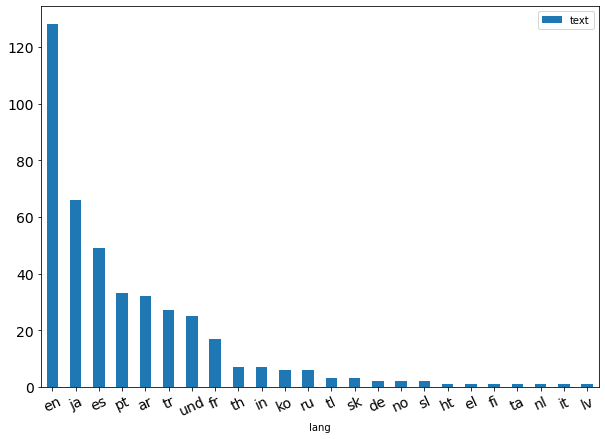

In [ ]:
# Tratamiento Extra - Consideracion del Idioma del Tweet
'''
Se realiza un analisis de los tweets a partir de la columna [lang] para saber la cantidad de tweets
que existen para los distintos idiomas, ya que este sera un punto importante a considerar,
teniendo en cuenta que de disponde de un diccionario de palabras en ingles para su calificacion
del sentimiento.
'''
# Se realiza una agrupacion por la columna [lang] y su respectivo conteo de tweets
langs = tweetsCls.groupby('lang')[['text']].count().reset_index()
# langs.sort_values(by="text", ascending=False) # S epresenta de forma ordenada descendente
langs.sort_values(by="text", ascending=False).plot.bar(x='lang', y='text', rot=25, fontsize=14, figsize=(10, 7))

In [ ]:
'''
A partir de esto podemos observar que existe gran cantdad de tweets en ingles, por ende,
 se procedera a trabajar con dichos tweets en la sigueinte fase del tratamiento de los datos
'''
langs[langs.loc[:, 'lang'] == 'en']

,lang,text
3,en,128


In [ ]:
# Selecionando los tweets de interes
'''
Se selecciona todos los tweets de idioma ingles y finalmente se crea un nuevo dataframe
que contendra unicamente el texto de dichos tweets
'''
twEng = tweetsCls[tweetsCls.loc[:, 'lang'] == 'en'].reset_index() #Seleccionar los tweets idioma [EN]
twEng = twEng.filter(['text'], axis=1) # Seleccionar solo la columna [text]

'''
Adicionalmente se guarda en otro dataframe los tweets de otros idiomas para un estudio posterior
'''
twOtherLng = tweetsCls[tweetsCls.loc[:, 'lang'] != 'en'].reset_index() #Seleccionar los tweets idioma diferente a [EN]
twOtherLng = twOtherLng.filter(['text'], axis=1) # Seleccionar solo la columna [text]

In [ ]:
# Mostramos algunos registros del nuevo dataframe filtrado [EN]
twEng.head()

,text
0,@Brenamae_ I WHALE SLAP YOUR FIN AND TELL YOU ...
1,RT @byunghns: 😭 I LOVE #틴탑 SO MUCH #쉽지않아 IS GO...
2,@hailee_danielsx I'm not mean cuz I'm ugly so ya
3,You better believe your beautiful
4,RT @baileymac02: CAN'T WAIT! I am playing @Soc...


In [ ]:
# Mostramos algunos registros del nuevo dataframe filtrado [OTHER LANGS]
twOtherLng.head()

,text
0,Metin Şentürk Twitterda @metinsenturk MUHTEŞEM...
1,que hdp maicon lo que le hizo a david luiz jaj...
2,ドライ！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！
3,RT @Positivamos: tudo o que eu quero é um amor...
4,RT @GossipRoomOff: Si Nathalie sait pertinemme...


### 3) Limpieza del Texto

In [ ]:
# Visualizando un Tweet y ejemplo de limpieza de texto (Remover caracteres especiales)
print(twEng['text'][1].lower())
print(unicodedata.normalize('NFKD', twEng['text'][1].lower()).encode('ascii', 'ignore').decode('utf-8').strip())

rt @byunghns: 😭 i love #틴탑 so much #쉽지않아 is going to be so good 😭
rt @byunghns:  i love # so much # is going to be so good


In [ ]:
# Método para limpiar el texto de cada tweets
'''
Este método se encarga de procesar cada texto he ir removiendo ciertos caracteres o palabras
que no aporten  en el calculo del sentimiento tales como: username, hashtag, urls, emojis, 
entre otros
'''
def cleanText(text):
  # 1. Converit texto a minusculas
  text = text.lower()
  # 2. Limpieza de urls
  text =  re.sub('(https?|ftp|file):\/\/\S+', " ", text)
  # 3. Limpieza de usernames
  text =  re.sub('(@[^\s]+\s)', " ", text)
  # 4. Limpieza de hashtags
  text =  re.sub('(#[^\s]+\s)', " ", text)
  # 5. Limpieza de palabra rt, en el caso de retweets
  text =  re.sub('^rt', "", text)
  # 6. Elimina caracteres especiales
  text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
  # 7. Limpiar otros caracteres especiales
  text =  re.sub('\W+', " ", text)
  # 8. Limpiza de caracateres blancos, inicio y final
  text = text.strip()
  return text

In [ ]:
# Limpieza del Texto y conteo de Palabras
twEng['cleanText'] = twEng['text'].apply(lambda x: cleanText(x)) # Ejecuta el metodo de limpueza para cada tweet y guarda en una nueva columna 
twEng['totalWords'] = twEng['cleanText'].apply(lambda x: len(x.split())) # Cuenta el totaol de palabras en el texto limpio
twEng.head()

,text,cleanText,totalWords
0,@Brenamae_ I WHALE SLAP YOUR FIN AND TELL YOU ...,i whale slap your fin and tell you one last ti...,13
1,RT @byunghns: 😭 I LOVE #틴탑 SO MUCH #쉽지않아 IS GO...,i love so much is going to be so good,10
2,@hailee_danielsx I'm not mean cuz I'm ugly so ya,i m not mean cuz i m ugly so ya,10
3,You better believe your beautiful,you better believe your beautiful,5
4,RT @baileymac02: CAN'T WAIT! I am playing @Soc...,can t wait i am playing at the london soccerdo...,17


In [ ]:
# Otras consideraciones
'''
Se verifica si existen tweets sin palabras luego de la limpieza
de existir, es recomendable omitirlos en el proceso de determianr el sentimeinto
ya que aportarian al no tener al menos una palabra a buscar en el diccionario

* Para este caso NO se encontro ningun tweet sin palabras
'''
twEng[twEng.loc[:, 'totalWords'] == 0].count()

text          0
cleanText     0
totalWords    0
dtype: int64

### Carga de Datos (Diccionario de Palabras [EN])

In [ ]:
# Carga del diccionario de palabras con sentimiento
sent = pd.read_csv(sentimientos, delimiter='\t', names=['word', 'sent']) #Se lee un archivo csv cmoo dataframe delimitado por el tabulador

In [ ]:
# Mostramos algunos registros aleatorios del diccionario de palabras
sent.sample(10)

,word,sent
626,derided,-2
732,disregards,-2
332,burdened,-2
1348,intimidates,-2
194,attract,1
1239,ignored,-2
2380,violent,-3
2347,useful,2
1344,interruption,-2
856,enslave,-2


### 4) Determinar Sentimiento del Tweet

In [ ]:
# Método para determianr el sentimeinto del Tweets
'''
EL método recibira como parametro el texto limpio del tweet para convertirlo en un arreglo
de palabras para posteriormente ser procesadas una a una en buscaque de su respectivo
sentimeinto en el diccioanrio de palabras, retornando un arreglo de tuplas (palabra, sent)
con el sentimiento encontrado en el diccionario
'''
def setSent(text):
  words = text.split() # Crea un arreglo de palabras a partir del texto
  wordsSent = []
  if len(words) > 0: # Verificamos si el arreglo es vacio, (solo si no tiene palabras)
    for w in words: # Se recorre cada palabra del texto en un bucle
      val = sent.loc[sent['word']==w] # Buscamos la palabra en el diccionario
      if not val.empty: # Se verifica si se encontro la palabra en el diccionario
        wordsSent.append((w, val['sent'].item())) # Se añañde la tupla al arreglo
  return wordsSent

In [ ]:
# Encontrar las palabras con sentimiento y asignar en nueva columna
twEng['wordsSent'] = twEng['cleanText'].apply(lambda x: setSent(x)) #Se aplica el método a cada tweet
twEng.sample(10) # Se presenta una muestra con la nueva columna de palabras con sentimeinto del tweet

,text,cleanText,totalWords,wordsSent
33,RT @connpost: #Milford school janitor arrested...,school janitor arrested for leaving gifts note...,9,"[(arrested, -3)]"
52,"Turkey Strawberry Brie Sandwich, http://t.co/K...",turkey strawberry brie sandwich,4,[]
47,@Ru_ru50 ill beat that ass 19 times tonight 😉😏😘,ill beat that ass 19 times tonight,7,"[(ill, -2), (ass, -4)]"
45,JUST AHHHHHH😍😍😍😍🙌😱😍😍😍 http://t.co/eAdv1R3u4j,just ahhhhhh,2,[]
17,Chancho 🐷🐷🐷 http://t.co/lmytpEILGf,chancho,1,[]
62,@JessicaFappit and the winner of the best lunc...,and the winner of the best lunchtime visual go...,10,"[(winner, 4), (best, 3)]"
37,I just took a test where the answer to a quest...,i just took a test where the answer to a quest...,15,"[(was, 0)]"
12,"@Aurinth I think it's possible, and sometimes ...",i think it s possible and sometimes scenes lik...,23,"[(like, 2)]"
101,@NourhanIsmail97 MH we lolo we 2 mesh hat3rfyhom,mh we lolo we 2 mesh hat3rfyhom,7,[]
48,RT @onlyxibest: @LvBradshaw @Monarch544 it wil...,it will be the highlight of my week,8,"[(highlight, 2)]"


In [ ]:
# Ejemplo unitario para determinar el sentimeinto de un tweet
tmpWords = twEng['wordsSent'].sample().item() # se escoge un tweet al azar
print(f"Words list: {tmpWords}")
print(f"SUM: {sum(list(x[1] for x in tmpWords)) if len(tmpWords) > 0 else 'und'}") # Se calcula la suma del sentimento de cada palabra
print(f"AVG: {sum(list(x[1] for x in tmpWords))/len(tmpWords) if len(tmpWords) > 0 else 'und'}") # ALTERNATIVA -> Se calcula el promedio del sentimiento de cada palabra

Words list: [('lol', 3), ('niggas', -5), ('kill', -3)]
SUM: -5
AVG: -1.6666666666666667


In [ ]:
# Calcular el sentimiento de los tweets en Ingles
'''
Para cada tweet del dataframe [EN], se aplica una función a la columna que contiene las palabras con sentimiento 
para obtener la suma del sentimiento de cada palabra y asi determinar el sentimiento del tweet.

Consideración: Se debe tener en cuenta que existen tweet a los cuales no se les encontro
ninguna palabra con sentimeinto a partir del diccionario, para lo cual si el arreglo de [wordsSent] es vacio
se le asignara sentimiento indefinido [und] al tweet
'''
twEng['textSent'] = twEng['wordsSent'].apply(lambda tmpWords: sum(list(x[1] for x in tmpWords)) if len(tmpWords) > 0 else 'und') # Crea una columan con el sentimeinto del texto
twEng.sample(10) # Presenta una muestra 


,text,cleanText,totalWords,wordsSent,textSent
78,"I've harvested 1,134 of food! http://t.co/Fcl9...",i ve harvested 1 134 of food gameinsight,8,[],und
77,RT @fbjooohm: @AJApplegateXXX zoey monroe @ju...,zoey monroe squirt in my face september 2014,8,[],und
120,"RT @Tarunvijay: Popularly known as ""Mahakavi B...",popularly known as mahakavi bharathiyar he wro...,20,"[(glory, 2), (freedom, 2)]",4
37,I just took a test where the answer to a quest...,i just took a test where the answer to a quest...,15,"[(was, 0)]",0
91,@m_d__ha I can't believe this 😭,i can t believe this,5,[],und
0,@Brenamae_ I WHALE SLAP YOUR FIN AND TELL YOU ...,i whale slap your fin and tell you one last ti...,13,[],und
72,People at my school think being gay is a choic...,people at my school think being gay is a choic...,30,"[(want, 1), (die, -3)]",-2
105,@BeyonceExplicit hello beyonce ♥♥♥,hello beyonce,2,[],und
111,Dear downstairs neighbros: 1:00 PM on a Wednes...,dear downstairs neighbros 1 00 pm on a wednesd...,23,"[(dear, 2), (agreed, 1), (nice, 3)]",6
5,Vince Staples so cold,vince staples so cold,4,[],und


In [ ]:
# Imprimir muestra con sentimiento
twEng[twEng.loc[:, 'textSent'] != 'und']#[['text', 'textSent']] 


,text,cleanText,totalWords,wordsSent,textSent
1,RT @byunghns: 😭 I LOVE #틴탑 SO MUCH #쉽지않아 IS GO...,i love so much is going to be so good,10,"[(love, 3), (good, 3)]",6
2,@hailee_danielsx I'm not mean cuz I'm ugly so ya,i m not mean cuz i m ugly so ya,10,"[(ugly, -3)]",-3
3,You better believe your beautiful,you better believe your beautiful,5,"[(better, 2), (beautiful, 3)]",5
6,RT @Nashgrier: Happy Birthday to one of my bes...,happy birthday to one of my best friends can t...,21,"[(happy, 3), (best, 3), (good, 3)]",9
7,I liked a @YouTube video from @jordzcreations ...,i liked a video from top 5 rated players in fi...,15,"[(liked, 2), (top, 2)]",4
...,...,...,...,...,...
121,RT @9GAG: My mood depends on how good my hair ...,my mood depends on how good my hair looks,9,"[(good, 3)]",3
123,RT @NKsubs: Leeteuk: Yeaaa (gets up)\nKangin: ...,leeteuk yeaaa gets up kangin hyung sit down re...,18,"[(like, 2)]",2
124,RT @Gabriele_Corno: Natural History Museum @ L...,natural history museum london by richard beres...,8,"[(natural, 1)]",1
125,RT @BestofCancer: #Cancer needs sincerity.,needs sincerity,2,"[(sincerity, 2)]",2


### 5) Consideraciones Extras
Como actividad extra se realiza las siguientes actividades:
* Tabular el sentimeinto de los tweets
* Convertir el sentimiento a variable categorica
* Determinar el sentimento de los tweets con otros idiomas

In [ ]:
# Tabulando los tweets por sentimiento
countSentEn = twEng[twEng.loc[:, 'textSent'] != 'und'].groupby('textSent')[['text']].count() #Se selecciona los tweets con sentimeinto y se agrupa por calificación
countSentEn.rename(columns={'text':'count'}).T.style.background_gradient( cmap='RdYlGn', axis=1 ) # Se presenta el tabulado en forma invertida y con gradiente para mejor visualización

textSent,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,9,10
count,2,2,1,4,8,5,2,5,9,10,6,3,4,1,3,1


In [ ]:
# Método para categorizar el sentimiento del Tweet
'''
Como un proceso extra se considera convertir los valores de sentimeinto numerico a un valor categorico
considerando la siguientes reglas:
  * SI sentimiento es menor o igual a -1, su valor sera NEGATIVE
  * SI sentimiento es mayor o igual a 1, su valor sera POSITIVE
  * SI sentimeinto es 0, su valor sera NEUTRAL 
'''
def sentCategorical(sent):
  if (sent <= -1 ):
    return 'NEGATIVE'
  elif (sent >= 1 ):
    return 'POSITIVE'
  else:
    return 'NEUTRAL'

In [ ]:
# Convertir el sentimiento a variable categorica
twEngSent = twEng[twEng.loc[:, 'textSent'] != 'und'].reset_index() # se crea un nuevo dataframe para procesar los tweets con sentimiento
twEngSent['sentCtgrl'] = twEngSent['textSent'].apply(lambda x: sentCategorical(x)) # Se aplica el método para determinar el valor categorico del sentimiento
twEngSent.sample(10) # Se presenta una muestar del dataframe

,index,text,cleanText,totalWords,wordsSent,textSent,sentCtgrl
10,19,xxx vids: Lovely chick Cameron Love hardcore t...,xxx vids lovely chick cameron love hardcore te...,9,"[(lovely, 3), (love, 3)]",6,POSITIVE
62,123,RT @NKsubs: Leeteuk: Yeaaa (gets up)\nKangin: ...,leeteuk yeaaa gets up kangin hyung sit down re...,18,"[(like, 2)]",2,POSITIVE
38,72,People at my school think being gay is a choic...,people at my school think being gay is a choic...,30,"[(want, 1), (die, -3)]",-2,NEGATIVE
59,119,"I'm sure they were up! Keep trying.""@BotsBoyGe...",i m sure they were up keep trying will do trie...,25,"[(was, 0)]",0,NEUTRAL
17,35,Ur sick bud,ur sick bud,3,"[(sick, -2)]",-2,NEGATIVE
61,121,RT @9GAG: My mood depends on how good my hair ...,my mood depends on how good my hair looks,9,"[(good, 3)]",3,POSITIVE
37,71,"Lost my headphones , my day is over 😤😤",lost my headphones my day is over,7,"[(lost, -3)]",-3,NEGATIVE
3,6,RT @Nashgrier: Happy Birthday to one of my bes...,happy birthday to one of my best friends can t...,21,"[(happy, 3), (best, 3), (good, 3)]",9,POSITIVE
26,51,We’re very proud to host tonight's “Evening Wi...,were very proud to host tonight s evening with...,24,"[(proud, 2)]",2,POSITIVE
36,70,Best person in the world.💕🌎🌻👯 http://t.co/nwui...,best person in the world,5,"[(best, 3)]",3,POSITIVE


In [ ]:
# Se agrupa por variable categorica para obtener el conteo por cada uno
twEngSent.groupby(['sentCtgrl'])[['cleanText']].count().reset_index()

,sentCtgrl,cleanText
0,NEGATIVE,22
1,NEUTRAL,2
2,POSITIVE,42


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f30ebda9ed0>],
      dtype=object)

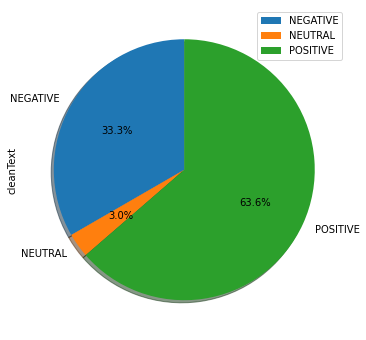

In [ ]:
# Representación grafica del sentimiento categorico
twEngSent[["cleanText", "sentCtgrl"]].groupby(['sentCtgrl']).count().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(8,6), autopct='%1.1f%%')

In [ ]:
# Determinar el sentimiento de los tweets con otro idioma
twOtherLng['cleanText'] = twOtherLng['text'].apply(lambda x: cleanText(x)) # Ejecuta el metodo de limpueza para cada tweet y guarda en una nueva columna 
twOtherLng['totalWords'] = twOtherLng['cleanText'].apply(lambda x: len(x.split())) # Cuenta el totaol de palabras en el texto limpio
twOtherLng['wordsSent'] = twOtherLng['cleanText'].apply(lambda x: setSent(x)) #Se aplica el método a cada tweet
twOtherLng['textSent'] = twOtherLng['wordsSent'].apply(lambda tmpWords: sum(list(x[1] for x in tmpWords)) if len(tmpWords) > 0 else 'und') # Crea una columan con el sentimeinto del texto
twOtherLng

,text,cleanText,totalWords,wordsSent,textSent
0,Metin Şentürk Twitterda @metinsenturk MUHTEŞEM...,metin senturk twitterda muhtesem uclu sen ben ...,8,[],und
1,que hdp maicon lo que le hizo a david luiz jaj...,que hdp maicon lo que le hizo a david luiz jaj...,16,[],und
2,ドライ！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！,,0,[],und
3,RT @Positivamos: tudo o que eu quero é um amor...,tudo o que eu quero e um amor sincero,9,[],und
4,RT @GossipRoomOff: Si Nathalie sait pertinemme...,si nathalie sait pertinemment que son couple n...,20,[],und
...,...,...,...,...,...
289,RT @temasparamujer: 3 Consejos y asesoramiento...,3 consejos y asesoramiento para las rupturas m...,8,[],und
290,RT @BLEACHmei: BLEACH好きな人RTふぁぼお願いします♪\n\n#BLEA...,bleachrt,1,[],und
291,RT @hojimin31814: ไอจีแทยอนมีทุกอย่างจริงๆนะ ย...,,0,[],und
292,RT @AL_shiratori: 【中毒性注意】納豆にちょい足しすると捗る禁断の廃人飯レシ...,,0,[],und


In [ ]:
# Imprimir muestra con sentimiento
twOtherLng[twOtherLng.loc[:, 'textSent'] != 'und']

,text,cleanText,totalWords,wordsSent,textSent
60,-\nQUEIMAR A LINGUA NO CAFÉ &amp; UMA DAS PIOR...,queimar a lingua no cafe amp uma das piores co...,10,"[(no, -1)]",-1
101,"No trato de ser mejor que nadie, trato de ser ...",no trato de ser mejor que nadie trato de ser l...,19,"[(no, -1), (ha, 2)]",1
130,RT @jmfmoran: Qué buena idea llamar al FBI. To...,que buena idea llamar al fbi total eeuu no abu...,22,"[(no, -1)]",-1
140,"RT @TanPajeras: Pobre, se cree sirena y no lle...",pobre se cree sirena y no llega a bagre,9,"[(no, -1)]",-1
162,RT @augusto_rando: Si no sabías qué es la infl...,si no sabias que es la inflacion ahora lo sabes,10,"[(no, -1)]",-1
181,"No olvide nada, solo deje de lado lo que ya no...",no olvide nada solo deje de lado lo que ya no ...,13,"[(no, -1), (no, -1)]",-2
183,RT @Aliciabissiri: C'est dommage qu'elle dise ...,c est dommage qu elle dise a tout le monde que...,19,"[(tout, -2)]",-2
185,@RenoiDuVillage lol tavais grail a la cantine ...,lol tavais grail a la cantine d ou t etais max...,12,"[(lol, 3)]",3
204,@rihanna miss ya,miss ya,2,"[(miss, -2)]",-2
241,RT @ChochoMartinez1: Cami mientras me cagaba a...,cami mientras me cagaba a pedo la abrazaba y n...,16,"[(no, -1)]",-1


In [ ]:
# Convertir el sentimiento a variable categorica
twOtherLngSent = twOtherLng[twOtherLng.loc[:, 'textSent'] != 'und'].reset_index() # se crea un nuevo dataframe para procesar los tweets con sentimiento
twOtherLngSent['sentCtgrl'] = twOtherLngSent['textSent'].apply(lambda x: sentCategorical(x)) # Se aplica el método para determinar el valor categorico del sentimiento
twOtherLngSent

,index,text,cleanText,totalWords,wordsSent,textSent,sentCtgrl
0,60,-\nQUEIMAR A LINGUA NO CAFÉ &amp; UMA DAS PIOR...,queimar a lingua no cafe amp uma das piores co...,10,"[(no, -1)]",-1,NEGATIVE
1,101,"No trato de ser mejor que nadie, trato de ser ...",no trato de ser mejor que nadie trato de ser l...,19,"[(no, -1), (ha, 2)]",1,POSITIVE
2,130,RT @jmfmoran: Qué buena idea llamar al FBI. To...,que buena idea llamar al fbi total eeuu no abu...,22,"[(no, -1)]",-1,NEGATIVE
3,140,"RT @TanPajeras: Pobre, se cree sirena y no lle...",pobre se cree sirena y no llega a bagre,9,"[(no, -1)]",-1,NEGATIVE
4,162,RT @augusto_rando: Si no sabías qué es la infl...,si no sabias que es la inflacion ahora lo sabes,10,"[(no, -1)]",-1,NEGATIVE
5,181,"No olvide nada, solo deje de lado lo que ya no...",no olvide nada solo deje de lado lo que ya no ...,13,"[(no, -1), (no, -1)]",-2,NEGATIVE
6,183,RT @Aliciabissiri: C'est dommage qu'elle dise ...,c est dommage qu elle dise a tout le monde que...,19,"[(tout, -2)]",-2,NEGATIVE
7,185,@RenoiDuVillage lol tavais grail a la cantine ...,lol tavais grail a la cantine d ou t etais max...,12,"[(lol, 3)]",3,POSITIVE
8,204,@rihanna miss ya,miss ya,2,"[(miss, -2)]",-2,NEGATIVE
9,241,RT @ChochoMartinez1: Cami mientras me cagaba a...,cami mientras me cagaba a pedo la abrazaba y n...,16,"[(no, -1)]",-1,NEGATIVE


In [ ]:
# Se agrupa por variable categorica para obtener el conteo por cada uno
twOtherLngSent.groupby(['sentCtgrl'])[['cleanText']].count().reset_index()

,sentCtgrl,cleanText
0,NEGATIVE,8
1,POSITIVE,3


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f30ebb22450>],
      dtype=object)

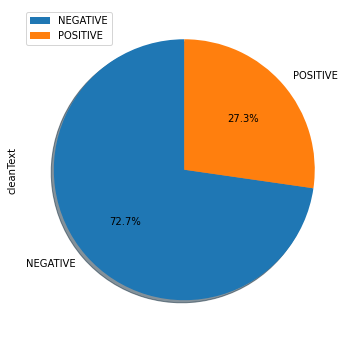

In [ ]:
# Representación grafica del sentimiento categorico
twOtherLngSent[["cleanText", "sentCtgrl"]].groupby(['sentCtgrl']).count().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(8,6), autopct='%1.1f%%')

### 6) Observaciones
* Como se abordó el problema, se trabajó los tweets desde la depuración para considerar únicamente los tweets relevantes, en este caso aquellos del idioma inglés, ya que el diccionario de palabras con sentimiento estaba formado por palabras en inglés.
* Como parte del análisis se determinó el sentimiento en forma categórica para dar una representación más entendible visualmente.
* Para comprobar si los tweets en otros idiomas podían ser calificados con el diccionario de datos proporcionado, se realizó el mismo procesamiento logrando comprobar visualmente que fueron pocos los tweets calificados, eso debido a que ciertos tweets de otros idiomas, especialmente el de español tienen ciertas palabras que son idénticas en el inglés, como por ejemplo la palabra (NO).

## **Ejercicio #2**
Calcular el sentimiento de aquellas palabras o conjunto de palabras que no tienen un valor asociado en el archivo de “sentimientos”..

### Pasos a Realizar
* 1) Generar nuevos Dataframes [EN - OTHERLANGS]
* 2) Definir sentimiento de palabras que no constant en diccionario
* 3) Consideraciones Extras
* 4) Observaciones

### 1) Generar nuevos Dataframes

In [ ]:
# Generar nuevo dataframe a partir del de tweets [EN] con sentimiento
twEnEval = twEngSent[['cleanText', 'totalWords', 'wordsSent', 'textSent', 'sentCtgrl']].reset_index()
twEnEval.sample(10)

,index,cleanText,totalWords,wordsSent,textSent,sentCtgrl
35,35,thank god for the gr skywalk lakersthatdontwan...,7,"[(thank, 2), (god, 1)]",3,POSITIVE
6,6,dreams are as real as you want them to be drea...,24,"[(dreams, 1), (want, 1), (dreams, 1), (dreams,...",4,POSITIVE
39,39,things are hard,3,"[(hard, -1)]",-1,NEGATIVE
38,38,people at my school think being gay is a choic...,30,"[(want, 1), (die, -3)]",-2,NEGATIVE
14,14,abandon greed,2,"[(abandon, -2), (greed, -3)]",-5,NEGATIVE
34,34,paint the town this weekend at its easy to get...,14,"[(easy, 1)]",1,POSITIVE
42,42,real shit,2,"[(shit, -4)]",-4,NEGATIVE
65,65,just waking up in the morning gotta thank g o d,11,"[(thank, 2)]",2,POSITIVE
54,54,dear downstairs neighbros 1 00 pm on a wednesd...,23,"[(dear, 2), (agreed, 1), (nice, 3)]",6,POSITIVE
60,60,popularly known as mahakavi bharathiyar he wro...,20,"[(glory, 2), (freedom, 2)]",4,POSITIVE


In [ ]:
# Generar nuevo dataframe a partir del de tweets [OTHER LANGS] con sentimiento
twOtherLngEval = twOtherLngSent[['cleanText', 'totalWords', 'wordsSent', 'textSent', 'sentCtgrl']].reset_index()
twOtherLngEval.head()

,index,cleanText,totalWords,wordsSent,textSent,sentCtgrl
0,0,queimar a lingua no cafe amp uma das piores co...,10,"[(no, -1)]",-1,NEGATIVE
1,1,no trato de ser mejor que nadie trato de ser l...,19,"[(no, -1), (ha, 2)]",1,POSITIVE
2,2,que buena idea llamar al fbi total eeuu no abu...,22,"[(no, -1)]",-1,NEGATIVE
3,3,pobre se cree sirena y no llega a bagre,9,"[(no, -1)]",-1,NEGATIVE
4,4,si no sabias que es la inflacion ahora lo sabes,10,"[(no, -1)]",-1,NEGATIVE


### 2) Definir sentimiento de palabras que no constant en diccionario

In [ ]:
# Método que verifica si la palabra del tweet no existe en el diccionario y le asigna nuevo sentimiento
'''
EL método se encarga de procesar cada palabra del texto para veirficando si ya pertenece 
al diccionario de palabras con seintimiento, si esta no existe se le asigna un sentimiento
con la siguiente consideración:
  * sentimiento palabra = número de palabras/sentimiento tweet solo si tweet es diferente de 0
    caso contrario se le asigna el 0 como sentimiento 
'''
def checkWords(text, sentTw, lenWord):
  words = text.split() # Crea un arreglo de palabras a partir del texto
  wordsNoSent = []
  if len(words) > 0:
    for w in words:
      val = sent.loc[sent['word']==w]
      if val.empty:
        sentWord = lenWord/sentTw if sentTw != 0 else 0  # Se calcula el nuuevo sentimiento para la palabra sin sentimiento
        wordsNoSent.append((w, sentWord))
  return wordsNoSent

In [ ]:
# Asignar sentimiento a las palabras de Tweets [EN] que no constan en el diccionario
twEnEval['wordsNoSent'] = twEnEval.apply(lambda x: checkWords(x['cleanText'], x['textSent'], x['totalWords']), axis=1) # Crea nueva columna aplicando el método
twEnEval.sample(10) # Presenta una muestra con la nueva columna de palabras calificadas

,index,cleanText,totalWords,wordsSent,textSent,sentCtgrl,wordsNoSent
5,5,cat s out of the bag giving scotland more powe...,18,"[(no, -1)]",-1,NEGATIVE,"[(cat, -18.0), (s, -18.0), (out, -18.0), (of, ..."
57,57,eglobal solutions coming soon,4,"[(solutions, 1)]",1,POSITIVE,"[(eglobal, 4.0), (coming, 4.0), (soon, 4.0)]"
36,36,best person in the world,5,"[(best, 3)]",3,POSITIVE,"[(person, 1.6666666666666667), (in, 1.66666666..."
53,53,when she says the dick gets better every time ...,23,"[(dick, -4), (better, 2), (no, -1)]",-3,NEGATIVE,"[(when, -7.666666666666667), (she, -7.66666666..."
45,45,i thought i would be happy by now,8,"[(happy, 3)]",3,POSITIVE,"[(i, 2.6666666666666665), (thought, 2.66666666..."
64,64,needs sincerity,2,"[(sincerity, 2)]",2,POSITIVE,"[(needs, 1.0)]"
42,42,real shit,2,"[(shit, -4)]",-4,NEGATIVE,"[(real, -0.5)]"
16,16,school janitor arrested for leaving gifts note...,9,"[(arrested, -3)]",-3,NEGATIVE,"[(school, -3.0), (janitor, -3.0), (for, -3.0),..."
29,29,i m honestly just chilling dude,6,"[(chilling, -1)]",-1,NEGATIVE,"[(i, -6.0), (m, -6.0), (honestly, -6.0), (just..."
65,65,just waking up in the morning gotta thank g o d,11,"[(thank, 2)]",2,POSITIVE,"[(just, 5.5), (waking, 5.5), (up, 5.5), (in, 5..."


In [ ]:
# Asignar sentimiento a las palabras de Tweets [OTHER LANGS] que no constan en el diccionario
twOtherLngEval['wordsNoSent'] = twOtherLngEval.apply(lambda x: checkWords(x['cleanText'], x['textSent'], x['totalWords']), axis=1) # Crea nueva columna aplicando el método
twOtherLngEval # Presenta tweets con la nueva columna de palabras calificadas

,index,cleanText,totalWords,wordsSent,textSent,sentCtgrl,wordsNoSent
0,0,queimar a lingua no cafe amp uma das piores co...,10,"[(no, -1)]",-1,NEGATIVE,"[(queimar, -10.0), (a, -10.0), (lingua, -10.0)..."
1,1,no trato de ser mejor que nadie trato de ser l...,19,"[(no, -1), (ha, 2)]",1,POSITIVE,"[(trato, 19.0), (de, 19.0), (ser, 19.0), (mejo..."
2,2,que buena idea llamar al fbi total eeuu no abu...,22,"[(no, -1)]",-1,NEGATIVE,"[(que, -22.0), (buena, -22.0), (idea, -22.0), ..."
3,3,pobre se cree sirena y no llega a bagre,9,"[(no, -1)]",-1,NEGATIVE,"[(pobre, -9.0), (se, -9.0), (cree, -9.0), (sir..."
4,4,si no sabias que es la inflacion ahora lo sabes,10,"[(no, -1)]",-1,NEGATIVE,"[(si, -10.0), (sabias, -10.0), (que, -10.0), (..."
5,5,no olvide nada solo deje de lado lo que ya no ...,13,"[(no, -1), (no, -1)]",-2,NEGATIVE,"[(olvide, -6.5), (nada, -6.5), (solo, -6.5), (..."
6,6,c est dommage qu elle dise a tout le monde que...,19,"[(tout, -2)]",-2,NEGATIVE,"[(c, -9.5), (est, -9.5), (dommage, -9.5), (qu,..."
7,7,lol tavais grail a la cantine d ou t etais max...,12,"[(lol, 3)]",3,POSITIVE,"[(tavais, 4.0), (grail, 4.0), (a, 4.0), (la, 4..."
8,8,miss ya,2,"[(miss, -2)]",-2,NEGATIVE,"[(ya, -1.0)]"
9,9,cami mientras me cagaba a pedo la abrazaba y n...,16,"[(no, -1)]",-1,NEGATIVE,"[(cami, -16.0), (mientras, -16.0), (me, -16.0)..."


### 3) Consideraciones Extras
Habiendo calculado el sentimiento para las palabras que pertenecian al diccionario precargado, se puede considerar y realizar varias acciones como:

* Generar un nuevo diccionario
* Depurar nuevo diccionario
* Determinar nuevo Sentimiento

> **Generar nuevo diccionario**

In [ ]:
# Muestra de palabras con nuevo sentimiento
pd.DataFrame(twEnEval['wordsNoSent'][53], columns=['word', 'sent'])

,word,sent
0,when,-7.666667
1,she,-7.666667
2,says,-7.666667
3,the,-7.666667
4,gets,-7.666667
5,every,-7.666667
6,time,-7.666667
7,i,-7.666667
8,have,-7.666667
9,choice,-7.666667


In [ ]:
# Setear variables para cocatenar los arreglos de palabras con nuevo sentimeinto
global arrEn 
global arrOtherLng
arrEn = []
arrOtherLng  = []

In [ ]:
# Metodos para concatenar la lista de tuplas de las nuevas palabras con sentimiento
# Concatena palabras de tweets [EN]
def newWordsEnMethod(list):
  arrEn.extend(list) # Concatena los arreglos de la tupla de palabras

# Concatena palabras de tweets [OTHER LANGS]
def newWordsOtherLngMethod(list):
  arrOtherLng.extend(list) # Concatena los arreglos de la tupla de palabras

In [ ]:
# Extraer el arreglo de palabras nuevo sentimiento [EN]
twEnEval['wordsNoSent'].apply(lambda x: newWordsEnMethod(x)) # Procesa cada tweet para extraer las palabras nuevas con sentimiento
newEnDict = pd.DataFrame(arrEn, columns=['word', 'sent']) # Convierte el arreglo en un dataframe
newEnDict # Presenta una muestra del nuevo diccionario [EN]

,word,sent
0,i,1.666667
1,so,1.666667
2,much,1.666667
3,is,1.666667
4,going,1.666667
...,...,...
724,morning,5.500000
725,gotta,5.500000
726,g,5.500000
727,o,5.500000


In [ ]:
# Extraer el arreglo de palabras nuevo sentimiento [OTHER LANGS]
twOtherLngEval['wordsNoSent'].apply(lambda x: newWordsOtherLngMethod(x)) # Procesa cada tweet para extraer las palabras nuevas con sentimiento
newOtherLngDict = pd.DataFrame(arrOtherLng, columns=['word', 'sent']) # Convierte el arreglo en un dataframe
newOtherLngDict # Presenta una muestra del nuevo diccionario [OTHER LANGS]

,word,sent
0,queimar,-10.0
1,a,-10.0
2,lingua,-10.0
3,cafe,-10.0
4,amp,-10.0
...,...,...
116,ir,-16.0
117,jajajajaja,-16.0
118,n,-16.0
119,n,-16.0


> Depurar nuevo diccionario

`En este proceso se considera como una alternativa establecer el sentimiento de las palabras duplicadas pero con distinto sentimiento, ya que provienen de distintos tweets mediante la media de sus sentimentos calculados anteriormente`

In [ ]:
# Depuracion Dict [EN], se agrupa por palabras y se obtiene la media del sentimiento
newEnDict = newEnDict.groupby(['word'])[['sent']].mean().reset_index()
newEnDict

,word,sent
0,00,3.833333
1,1,-5.583333
2,19,-1.166667
3,24th,3.000000
4,5,3.750000
...,...,...
365,year,15.000000
366,yet,-0.083333
367,you,0.419444
368,young,-3.000000


In [ ]:
# Depuracion Dict [OTHER LANGS], se agrupa por palabras y se obtiene la media del sentimiento
newOtherLngDict = newOtherLngDict.groupby(['word'])[['sent']].mean().reset_index()
newOtherLngDict

,word,sent
0,a,-10.285714
1,abrazaba,-16.000000
2,abusa,-22.000000
3,ahora,-10.000000
4,al,-22.000000
...,...,...
88,va,-9.500000
89,vida,19.000000
90,vivian,-9.500000
91,y,-15.666667


> Determinar nuevo Sentimiento

`Considerando el nuevo diccionario de palabras y el precargado, se realizará un nuevo cálculo del sentimiento para los tweets en Inglés y comprobar si este varía.`

In [ ]:
# Concatenamos los diccionaros de palabras precargado y el nuevo en uno solo
fullDict = pd.concat([sent,newEnDict])
fullDict

,word,sent
0,abandon,-2.000000
1,abandoned,-2.000000
2,abandons,-2.000000
3,abducted,-2.000000
4,abduction,-2.000000
...,...,...
365,year,15.000000
366,yet,-0.083333
367,you,0.419444
368,young,-3.000000


In [ ]:
# Presentamos las estadisticas de los diccionarios
print(f"Count Dict [Sent]: {sent.count()}, \nCount Dict [newEnDict]: {newEnDict.count()}, \nCount Dict [fullDict] : {fullDict.count()}")

Count Dict [Sent]: word    2478
sent    2478
dtype: int64, 
Count Dict [newEnDict]: word    370
sent    370
dtype: int64, 
Count Dict [fullDict] : word    2848
sent    2848
dtype: int64


In [ ]:
reCalfTwEng = twEng[['cleanText','totalWords','wordsSent','textSent']].reset_index()
reCalfTwEng

,index,cleanText,totalWords,wordsSent,textSent
0,0,i whale slap your fin and tell you one last ti...,13,[],und
1,1,i love so much is going to be so good,10,"[(love, 3), (good, 3)]",6
2,2,i m not mean cuz i m ugly so ya,10,"[(ugly, -3)]",-3
3,3,you better believe your beautiful,5,"[(better, 2), (beautiful, 3)]",5
4,4,can t wait i am playing at the london soccerdo...,17,[],und
...,...,...,...,...,...
123,123,leeteuk yeaaa gets up kangin hyung sit down re...,18,"[(like, 2)]",2
124,124,natural history museum london by richard beres...,8,"[(natural, 1)]",1
125,125,needs sincerity,2,"[(sincerity, 2)]",2
126,126,just waking up in the morning gotta thank g o d,11,"[(thank, 2)]",2


In [ ]:
# Método para determianr el sentimeinto del Tweets usando nuevo diccionario
def setSentNew(text):
  words = text.split() # Crea un arreglo de palabras a partir del texto
  wordsSent = []
  if len(words) > 0: # Verificamos si el arreglo es vacio, (solo si no tiene palabras)
    for w in words: # Se recorre cada palabra del texto en un bucle
      val = fullDict.loc[fullDict['word']==w] # Buscamos la palabra en el diccionario
      if not val.empty: # Se verifica si se encontro la palabra en el diccionario
        wordsSent.append((w, val['sent'].item())) # Se añañde la tupla al arreglo
  return wordsSent

In [ ]:
# Encontrar las palabras con sentimiento y asignar en nueva columna
reCalfTwEng['wordsSentRecalf'] = reCalfTwEng['cleanText'].apply(lambda x: setSentNew(x)) #Se aplica el método a cada tweet
reCalfTwEng['textSentRecalf'] = reCalfTwEng['wordsSentRecalf'].apply(lambda tmpWords: sum(list(x[1] for x in tmpWords)) if len(tmpWords) > 0 else 'und') # Crea una columan con el sentimeinto del texto
reCalfTwEng = reCalfTwEng[reCalfTwEng.loc[:, 'textSent'] != 'und'].reset_index() # se crea un nuevo dataframe para procesar los tweets con sentimiento
reCalfTwEng['sentCtgrlRecalf'] = reCalfTwEng['textSentRecalf'].apply(lambda x: sentCategorical(x)) # Se aplica el método para determinar el valor categorico del sentimiento
reCalfTwEng

,level_0,index,cleanText,totalWords,wordsSent,textSent,wordsSentRecalf,textSentRecalf,sentCtgrlRecalf
0,1,1,i love so much is going to be so good,10,"[(love, 3), (good, 3)]",6,"[(i, 1.1591880341880343), (love, 3.0), (so, 0....",17.976,POSITIVE
1,2,2,i m not mean cuz i m ugly so ya,10,"[(ugly, -3)]",-3,"[(i, 1.1591880341880343), (m, -1.8333333333333...",-13.9288,NEGATIVE
2,3,3,you better believe your beautiful,5,"[(better, 2), (beautiful, 3)]",5,"[(you, 0.41944444444444445), (better, 2.0), (b...",2.475,POSITIVE
3,6,6,happy birthday to one of my best friends can t...,21,"[(happy, 3), (best, 3), (good, 3)]",9,"[(happy, 3.0), (birthday, 2.4972222222222222),...",29.851,POSITIVE
4,7,7,i liked a video from top 5 rated players in fi...,15,"[(liked, 2), (top, 2)]",4,"[(i, 1.1591880341880343), (liked, 2.0), (a, -0...",37.7419,POSITIVE
...,...,...,...,...,...,...,...,...,...
61,121,121,my mood depends on how good my hair looks,9,"[(good, 3)]",3,"[(my, 0.08787878787878806), (mood, 3.0), (depe...",14.6623,POSITIVE
62,123,123,leeteuk yeaaa gets up kangin hyung sit down re...,18,"[(like, 2)]",2,"[(leeteuk, 9.0), (yeaaa, 9.0), (gets, 0.666666...",79.7498,POSITIVE
63,124,124,natural history museum london by richard beres...,8,"[(natural, 1)]",1,"[(natural, 1.0), (history, 8.0), (museum, 8.0)...",56.3889,POSITIVE
64,125,125,needs sincerity,2,"[(sincerity, 2)]",2,"[(needs, 1.0), (sincerity, 2.0)]",3,POSITIVE


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f30e7790550>],
      dtype=object)

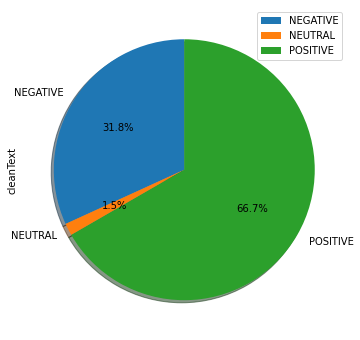

In [ ]:
# Representación grafica del sentimiento categorico
reCalfTwEng[["cleanText", "sentCtgrlRecalf"]].groupby(['sentCtgrlRecalf']).count().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(8,6), autopct='%1.1f%%')

> SENTIMIENTO ANTERIOR - Ejercicio 1

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f30e77c3890>],
      dtype=object)

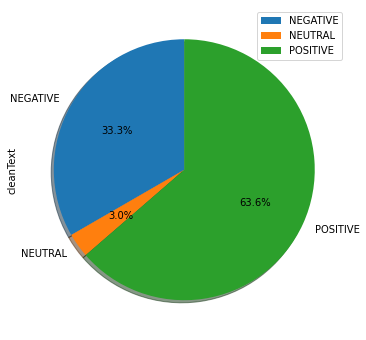

In [ ]:
# Representación grafica del sentimiento categorico - Ejercicio 1
twEngSent[["cleanText", "sentCtgrl"]].groupby(['sentCtgrl']).count().plot(kind='pie', subplots=True, shadow = True,startangle=90,figsize=(8,6), autopct='%1.1f%%')

### 4) Observaciones

* Determinar el sentimiento de las palabras no calificadas a partir del sentimiento del tweet, es una alternativa poco útil para un caso práctico real, debido a que se estaría asignando un sentimiento erróneo a alguna palabra.
* Para generar un nuevo diccionario a partir de tweets calificados se debería considerar como primer paso la eliminación de stopwords o palabras no relevantes, puedo así obtener un diccionario más factible para su uso posterior.
* En la actividad de determinar el sentimiento con el nuevo diccionario, se logra evidenciar que no fue muy relevante calificar las palabras sin sentimientos y reutilizarlas para una nueva calificación del tweet, ya que tienden a conservar el mismo sentimiento en su gran mayoría.